##MINIPROYECTO 1 - SEÑALES3

In [19]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
from ipywidgets import interact
from scipy import signal

1. Importacion de datos

<ipython-input-31-09fa92ffc311>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_Loc = np.array(Y_Loc)


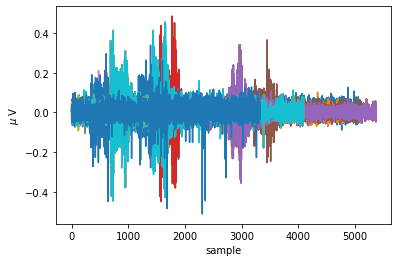

In [31]:
dataLoc = sc.loadmat('sisLoc.mat')
dataReg = sc.loadmat('sisReg.mat')
dataTele = sc.loadmat('sisTele.mat')
dataLoc.keys() # variables del diccionario

Y = dataLoc['Y']
fs = dataLoc['fs'][0][0]
#print(fs)

Y_Loc = []

for i in range(len(Y)):  # Eliminacion de ceros al final de los arreglos
  pos = len(Y[i])
  if Y[i][-1]==0:
    for j in reversed(Y[i]):
      if j!=0:
        Y_Loc.append(Y[i][0:pos])
        break
      pos = pos - 1

Y_Loc = np.array(Y_Loc)

for j in range(21):
  Y_Loc[j] = Y_Loc[j]-np.mean(Y_Loc[j])
  plt.plot(Y_Loc[j].T)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')

plt.show()

2.Filtrado de la señal

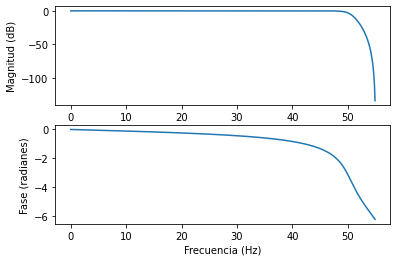

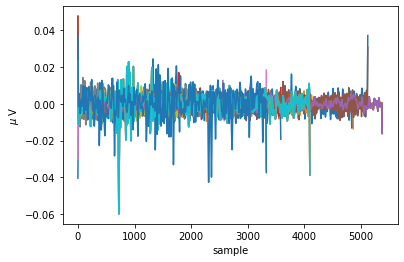

In [42]:
def Filtrado_pasabajas(x,fs,fc,order):

  b, a = signal.butter(order, fc/(fs/2), 'low')

  # Aplicar el filtro a la señal
  x = signal.filtfilt(b, a, Y_Loc[i])
  return x

w, h = sp.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h)))
ax[0].set_ylabel('Magnitud (dB)')
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
ax[1].set_ylabel('Fase (radianes)')
ax[1].set_xlabel('Frecuencia (Hz)')
plt.show()

fs = 110
fc = 50
order = 4

for i in range(21):
  Y_Loc[i] = Filtrado_pasabajas(Y_Loc[i],fs,fc,order)

for j in range(21):
  plt.plot(Y_Loc[j].T)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.show()